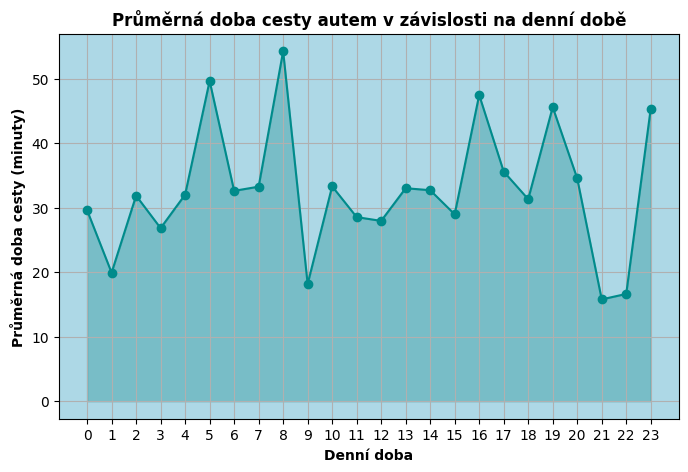

In [83]:
# 1

import random
import matplotlib.pyplot as plt

def cesta_autem(hustota_dopravy):
    délka_cesty = random.uniform(10, 30) * (1 + hustota_dopravy)
    return délka_cesty

def hustota_dopravy_generator():
    return random.uniform(0, 1)

def simulace_dne():
    hodiny = []
    průměrná_doba_cesty = []
    for hodina in range(24):
        hustota_dopravy = hustota_dopravy_generator()
        délka_cesty = cesta_autem(hustota_dopravy)
        hodiny.append(hodina)
        průměrná_doba_cesty.append(délka_cesty)
        #print(f"Denní doba: {hodina}:00 - {hodina+1}:00, Hustota dopravy: {hustota_dopravy}, Průměrná doba cesty: {délka_cesty} minut")

    plt.figure(figsize=(8,5))
    plt.plot(hodiny, průměrná_doba_cesty, marker='o', color="darkcyan")
    plt.gca().set_facecolor("lightblue")
    plt.fill_between(hodiny, 0, průměrná_doba_cesty, color="teal", alpha=0.3)
    plt.title('Průměrná doba cesty autem v závislosti na denní době', fontweight="bold")
    plt.xlabel('Denní doba', fontweight="bold")
    plt.ylabel('Průměrná doba cesty (minuty)', fontweight="bold")
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()

simulace_dne()

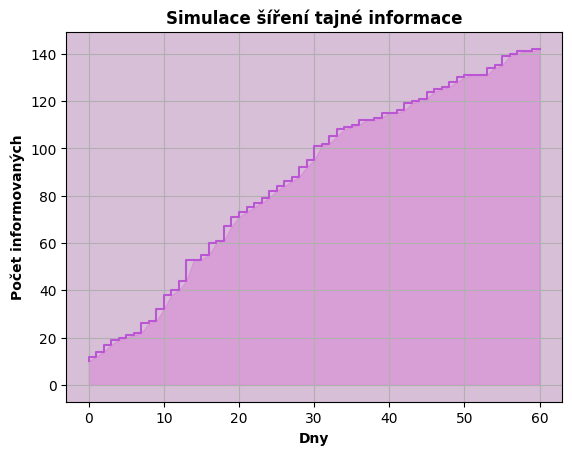

In [53]:
# 2 

import random
import numpy as np
import matplotlib.pyplot as plt

# Na přednášce algoritmizace a programování bylo jednoho dne 10 lidí ze 180 zapsaných.
# Padla tam velmi důležitá tajná zpráva. Pravděpodobnost, že jeden z 10 účastněných o této zprávě řekně dál je 10%.
# Každý, kdo tuto informaci zná se o ní nadále podělí se 2 dalšími studenty.
# Kolik studentů ze 180 bude informaci znát po 2 měsících?

pocet_zapsanych = 180            # počet studentů zapsaných na předmět KI/APR1
pocet_zucastnenych = 10          # počet studentů, kteří se zúčastnili přednášky
pravdepodobnost_sdileni = 0.1    # pravděpodobnost, že student prozradí tajnou informaci
rozsah_vlivu = 2                 # když už student ifnormaci prozradí, prozradí ji 2 dalším studentům
pocet_dni = 60                   # 2 měsíce

status_studenta = np.zeros(pocet_zapsanych)                                                  # stav daného studenta (zná / nezná informaci)  

indexy_zacatecne_informovanych = random.sample(range(pocet_zapsanych), pocet_zucastnenych)
status_studenta[indexy_zacatecne_informovanych] = 1                                          # počáteční stav zúčastněného studenta

pocet_informovanych = [sum(status_studenta)]                                                 # pole, kam se ukládá počet studentů, co už info znají v průběhu času

# simulace sdílení informace
for den in range(pocet_dni):
    for student in range(pocet_zapsanych):
        if status_studenta[student] == 1:
            for kontakt in range(student - rozsah_vlivu, student + rozsah_vlivu):
                if kontakt >= 0 and kontakt < pocet_zapsanych and random.random() < pravdepodobnost_sdileni:
                    status_studenta[kontakt] = 1
    
    pocet_informovanych.append(sum(status_studenta))

# graf simulace
plt.step(range(pocet_dni + 1), pocet_informovanych, color="mediumorchid")
plt.fill_between(range(pocet_dni + 1), pocet_informovanych, color="orchid", alpha=0.4)
plt.gca().set_facecolor("thistle")
plt.title('Simulace šíření tajné informace', fontweight="bold")
plt.xlabel('Dny', fontweight="bold")
plt.ylabel('Počet informovaných',fontweight="bold")
plt.grid(True)
plt.show()
